In [ ]:
#TODO:
#fix clustering, testing, implement argpairse?
#implement Pipeline?
#build classifier
#clean all scripts

#Massachusetts

In [5]:
import glob
import os
import re

from io import open

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.externals import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import MDS
from sklearn import metrics
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.pipeline import Pipeline

import text_cleaning as tc

%matplotlib inline

In [19]:
class Clustering(object):
    def __init__(self, local_dir, num_clusters):
        self.local_dir = local_dir
        self.text_clean = tc.TextPrep(local_dir)
        self.num_clusters = num_clusters
#         self.terms = terms
    
    def vectorize(self):
        tfidf_vectorizer = TfidfVectorizer(max_df=.8,
                                           stop_words='english',
                                           use_idf=True,
                                           tokenizer=self.text_clean.tokenize_and_stem
                                          )
        full_summaries = self.text_clean.summary_dict()
        summary_list = list(full_summaries.values())
        tfidf_matrix = self.vectorize().fit_transform(summary_list)
        terms = self.vectorize().get_feature_names()
        return terms
        
    def cluster(self):
        num_clusters = self.num_clusters
        km = KMeans(n_clusters=num_clusters)
        km.fit(self.vectorize())
        clusters = km.labels_.tolist()
        bills = {'names': self.text_clean.bill_name_list,
                 'synopsis': self.text_clean.summary_list,
                 'cluster': clusters
                }
        bills_df = pd.DataFrame(bills,
                                index = [clusters], 
                                columns = ['synopsis', 'cluster', 'names']
                               )
        vocab_df = self.text_clean.build_vocab_df()
        print("Top terms per cluster:")
        order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
        for cluster in range(num_clusters):
            print("Cluster {}:".format(cluster + 1))

            for ind in order_centroids[cluster, :10]: #replace 10 with n words per cluster
                top_terms = vocab_df.loc[self.vectorize.terms[ind].split(' ')].values.tolist()[0][0]
                print(' {}'.format(top_terms), end=',')
            print()
            
        return clusters
            
#     def plot(self):
#         dist = 1 - cosine_similarity(self.vectorize())
#         mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
#         pos = mds.fit_transform(dist)
#         xs, ys = pos[:, 0], pos[:, 1]
#         cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}
#         cluster_names = {0: 'school, public, finance, teacher', 
#                          1: 'tax, ad, valorem, appraised, homestead', 
#                          2: 'certain, criminal, state, offense', 
#                          3: 'health, abortion, certain, physicians', 
#         }

#         cluster_df = pd.DataFrame(dict(x=xs, y=ys, label=self.cluster(), title=self.text_clean.bill_name_list()))
#         groups = cluster_df.groupby('label')
#         fig, ax = plt.subplots(figsize=(17, 9)) # set size
#         ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#         #note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
#         for name, group in groups:
#             ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
#                     label=cluster_names[name], color=cluster_colors[name], 
#                     mec='none')
#             ax.set_aspect('auto')
#             ax.tick_params(axis= 'x',
#                            bottom='off',
#                            labelbottom='off',)
#             ax.tick_params(axis= 'y', 
#                            left='off',
#                            labelleft='off')

#         ax.legend(numpoints=1)

#         #add label in x,y position with the bill name as the label
#         for i in range(len(cluster_df)):
#             ax.text(cluster_df.loc[i]['x'], cluster_df.loc[i]['y'], cluster_df.loc[i]['title'], size=8)  

#         plt.show()

In [20]:
test = Clustering('/Users/rhaggerty/remote/bills/tx/data/', 4)
um = test.cluster()
um

KeyboardInterrupt: 

In [21]:
class Clustering(object):
    def __init__(self, local_dir, num_clusters):
        self.local_dir = local_dir
        self.text_clean = tc.TextPrep(local_dir)
        self.num_clusters = num_clusters
        self.tfidf_matrix, self.terms = self.vectorize()
#         self.clusters, self.top_terms_dict = self.cluster()
    
    def vectorize(self):
        tfidf_vectorizer = TfidfVectorizer(max_df=.8,
                                           stop_words='english',
                                           use_idf=True,
                                           tokenizer=self.text_clean.tokenize_and_stem
                                          )
        full_summaries = self.text_clean.summary_dict()
        summary_list = list(full_summaries.values())
        tfidf_matrix = tfidf_vectorizer.fit_transform(summary_list)
        terms = tfidf_vectorizer.get_feature_names()
        return tfidf_matrix, terms

    
    def cluster(self):
        num_clusters = self.num_clusters
        km = KMeans(n_clusters=num_clusters)
        km.fit(self.tfidf_matrix)
        clusters = km.labels_.tolist()
        vocab_df = self.text_clean.build_vocab_df()
        order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
        top_terms_dict = {}
        for cluster in range(self.num_clusters):
            top_terms_list = []
            for ind in order_centroids[cluster, :10]: #replace 10 with n words per cluster
                top_terms = vocab_df.loc[self.terms[ind].split(' ')].values.tolist()[0][0]
                top_terms_list.append(top_terms)
            top_terms_dict[cluster] = top_terms_list   
#         return clusters, top_terms_dict
    
    
#         #added this on for testing
        labels = km.labels_
        centroids = km.cluster_centers_

#         plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
#         plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5);
        data = self.tfidf_matrix.toarray()
#         print(data)
        for i in range(num_clusters):
            # select only data observations with cluster label == i
            ds = data[np.where(clusters==i)]
            # plot the data observations
            plt.plot(ds[:,0],ds[:,1],'o')
            # plot the centroids
            lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
            # make the centroid x's bigger
            plt.setp(lines,ms=15.0)
            plt.setp(lines,mew=2.0)
        plt.show()
            
    def plot(self):
        dist = 1 - cosine_similarity(self.tfidf_matrix)
        mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
        pos = mds.fit_transform(dist)
        xs, ys = pos[:, 0], pos[:, 1]
        color_list = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e']
        cluster_colors = dict(zip(self.top_terms_dict.keys(), color_list))
        cluster_names = self.top_terms_dict
        cluster_df = pd.DataFrame(dict(x=xs, y=ys, label=self.clusters, title=self.text_clean.bill_name_list()))
        groups = cluster_df.groupby('label')
        fig, ax = plt.subplots(figsize=(17, 9))
        ax.margins(0.05)
        for name, group in groups:
            ax.plot(group.x, group.y, marker='o', linestyle='', ms=10, 
                    label=cluster_names[name], color=cluster_colors[name], 
                    mec='none')
            ax.set_aspect('auto')
            ax.tick_params(axis= 'x',
                           bottom='off',
                           labelbottom='off',)
            ax.tick_params(axis= 'y', 
                           left='off',
                           labelleft='off')
        ax.legend(numpoints=1, loc='lower left', bbox_to_anchor=(0, -0.1))
        for i in range(len(cluster_df)):
            ax.text(cluster_df.loc[i]['x'], cluster_df.loc[i]['y'], cluster_df.loc[i]['title'], size=8)  
        plt.show()

In [22]:
test = Clustering('/Users/rhaggerty/remote/bills/tx/data/', 4)

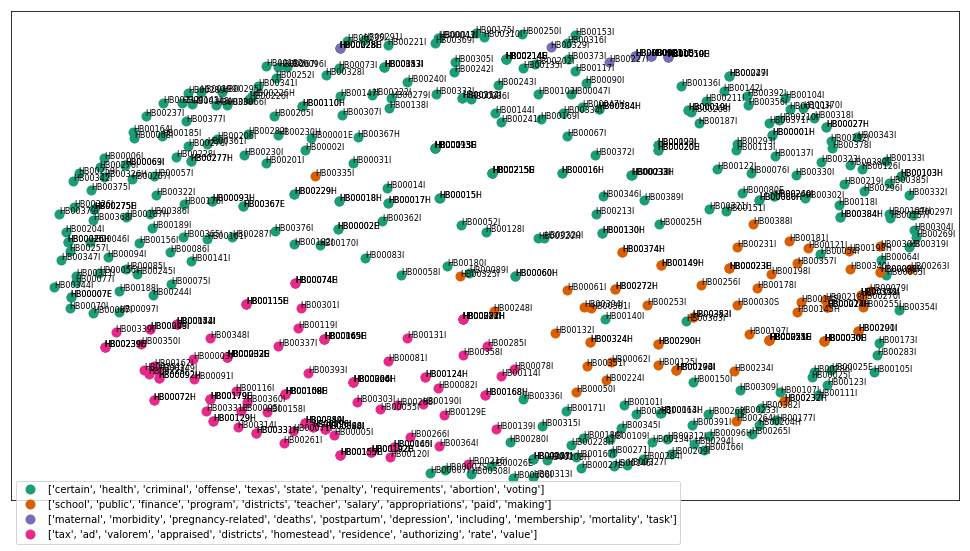

In [64]:
um = test.plot()
um

In [23]:
um_plot = test.vectorize()
print(test.tfidf_matrix[:, 0])

  (109, 0)	0.22489397447
  (113, 0)	0.299777940954
  (138, 0)	0.156825880879
  (142, 0)	0.504702420192
  (143, 0)	0.504702420192
  (168, 0)	0.289215322635
  (177, 0)	0.137166749606
  (180, 0)	0.228988290026
  (206, 0)	0.188259601556
  (258, 0)	0.284345414527
  (328, 0)	0.283635014256
  (336, 0)	0.308823982934
  (337, 0)	0.224533297919
  (346, 0)	0.248074860326
  (348, 0)	0.289215322635
  (350, 0)	0.278570267957
  (378, 0)	0.249592884487
  (381, 0)	0.198379339685
  (426, 0)	0.192867028711


In [41]:
print(test.tfidf_matrix[:,4])

  (0, 0)	0.384302168232
  (1, 0)	0.384302168232
  (2, 0)	0.384302168232
  (5, 0)	0.440964810323


In [42]:
print(test.tfidf_matrix)

  (0, 84)	0.399574244822
  (0, 4)	0.384302168232
  (0, 139)	0.139425298869
  (0, 36)	0.336862765356
  (0, 756)	0.344073701345
  (0, 784)	0.232418569632
  (0, 762)	0.361273809411
  (0, 16)	0.330339680296
  (0, 712)	0.384302168232
  (1, 84)	0.399574244822
  (1, 4)	0.384302168232
  (1, 139)	0.139425298869
  (1, 36)	0.336862765356
  (1, 756)	0.344073701345
  (1, 784)	0.232418569632
  (1, 762)	0.361273809411
  (1, 16)	0.330339680296
  (1, 712)	0.384302168232
  (2, 84)	0.399574244822
  (2, 4)	0.384302168232
  (2, 139)	0.139425298869
  (2, 36)	0.336862765356
  (2, 756)	0.344073701345
  (2, 784)	0.232418569632
  (2, 762)	0.361273809411
  :	:
  (501, 211)	0.287553195665
  (501, 606)	0.448026532261
  (501, 365)	0.505188288095
  (501, 439)	0.505188288095
  (502, 20)	0.282854015707
  (502, 821)	0.282854015707
  (502, 123)	0.481093321316
  (502, 697)	0.491391678692
  (502, 774)	0.267419943295
  (502, 635)	0.358643268023
  (502, 500)	0.408573403593
  (503, 672)	0.115823347361
  (503, 703)	0.22775265

In [25]:
test.tfidf_matrix.shape

(504, 857)

In [97]:
um_plot = test.vectorize()
print(test.tfidf_matrix[:, 0])

  (109, 0)	0.22489397447
  (113, 0)	0.299777940954
  (138, 0)	0.156825880879
  (142, 0)	0.504702420192
  (143, 0)	0.504702420192
  (168, 0)	0.289215322635
  (177, 0)	0.137166749606
  (180, 0)	0.228988290026
  (206, 0)	0.188259601556
  (258, 0)	0.284345414527
  (328, 0)	0.283635014256
  (336, 0)	0.308823982934
  (337, 0)	0.224533297919
  (346, 0)	0.248074860326
  (348, 0)	0.289215322635
  (350, 0)	0.278570267957
  (378, 0)	0.249592884487
  (381, 0)	0.198379339685
  (426, 0)	0.192867028711


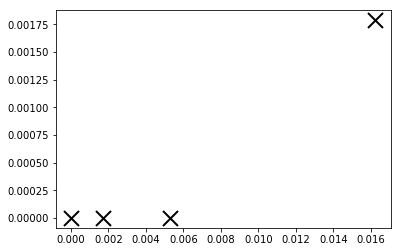

In [17]:
um_plot = test.cluster()

In [2]:
s = tc.TextPrep('/Users/rhaggerty/remote/bills/tx/data/')

In [3]:
tfidf_vectorizer = TfidfVectorizer(max_df=.8, stop_words='english',
                                 use_idf=True, tokenizer=s.tokenize_and_stem,)
full_summaries = s.summary_dict()
summary_list = list(full_summaries.values())
tfidf_matrix = tfidf_vectorizer.fit_transform(summary_list)
terms = tfidf_vectorizer.get_feature_names()
print(tfidf_matrix.shape)

(504, 857)


In [4]:
num_clusters = 4

km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

# #
# joblib.dump(km,  'doc_cluster.pkl')
# #
# km = joblib.load('doc_cluster.pkl')

In [27]:
print(tfidf_matrix[10,:])

  (0, 500)	0.639334712417
  (0, 54)	0.768928556823


In [29]:
print(tfidf_matrix[0,:])

  (0, 84)	0.399574244822
  (0, 4)	0.384302168232
  (0, 139)	0.139425298869
  (0, 36)	0.336862765356
  (0, 756)	0.344073701345
  (0, 784)	0.232418569632
  (0, 762)	0.361273809411
  (0, 16)	0.330339680296
  (0, 712)	0.384302168232


In [18]:
print(tfidf_matrix)

NameError: name 'tfidf_matrix' is not defined

In [17]:
labels = km.labels_
centroids = km.cluster_centers_
#         plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
#         plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5);
data = tfidf_matrix.toarray().nonzero()
# data
for i in range(num_clusters):
    # select only data observations with cluster label == i
    ds = data[np.where(clusters==i)]
    # plot the data observations
    plt.plot(ds[:,0],ds[:,1],'o')
    # plot the centroids
#             lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
#             # make the centroid x's bigger
#             plt.setp(lines,ms=15.0)
#             plt.setp(lines,mew=2.0)
plt.show()

TypeError: tuple indices must be integers or slices, not tuple

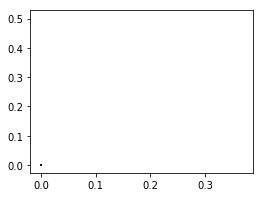

In [43]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(4, 3))
# ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
# est.fit(X)
X = tfidf_matrix.todense()
km.fit(X)
labels = km.labels_

plt.scatter([X[:, 3]], [X[:, 0]], [X[:, 2]],
           c=labels.astype(np.float), edgecolor='k')

In [30]:
bills = {'names': s.bill_name_list, 'synopsis': s.summary_list, 'cluster': clusters }
bills_df = pd.DataFrame(bills, index = [clusters] , columns = ['synopsis', 'cluster', 'names'])
bills_df['cluster'].value_counts()

0    278
2    105
1    104
3     17
Name: cluster, dtype: int64

In [59]:
from collections import defaultdict

vocab_df = s.build_vocab_df()
print("Top terms per cluster:")


# vocab_stemmed = [words_stemmed
#                  for summary in self.summary_list()
#                  for words_stemmed in self.tokenize_and_stem(summary)]
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

somedict = {}
for cluster in range(num_clusters):
    top_terms_list = []
    for ind in order_centroids[cluster, :10]: #replace 10 with n words per cluster
        top_terms = vocab_df.loc[terms[ind].split(' ')].values.tolist()[0][0]
        top_terms_list.append(top_terms)
    somedict[cluster] = top_terms_list   
print(somedict)

Top terms per cluster:
{0: ['certain', 'criminal', 'offense', 'health', 'penalty', 'state', 'abortion', 'voting', 'municipal', 'creating'], 1: ['tax', 'valorem', 'ad', 'appraised', 'districts', 'homestead', 'residence', 'authorizing', 'rate', 'value'], 2: ['school', 'public', 'finance', 'teacher', 'appropriations', 'districts', 'paid', 'making', 'program', 'retirement'], 3: ['maternal', 'morbidity', 'pregnancy-related', 'deaths', 'postpartum', 'depression', 'including', 'membership', 'mortality', 'task']}


In [18]:
dist = 1 - cosine_similarity(tfidf_matrix)
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)  # shape (n_components, n_samples)
xs, ys = pos[:, 0], pos[:, 1]
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}
cluster_names = {0: 'school, public, finance, teacher', 
                 1: 'tax, ad, valorem, appraised, homestead', 
                 2: 'certain, criminal, state, offense', 
                 3: 'health, abortion, certain, physicians', 
}

cluster_df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=s.bill_name_list()))
groups = cluster_df.groupby('label')

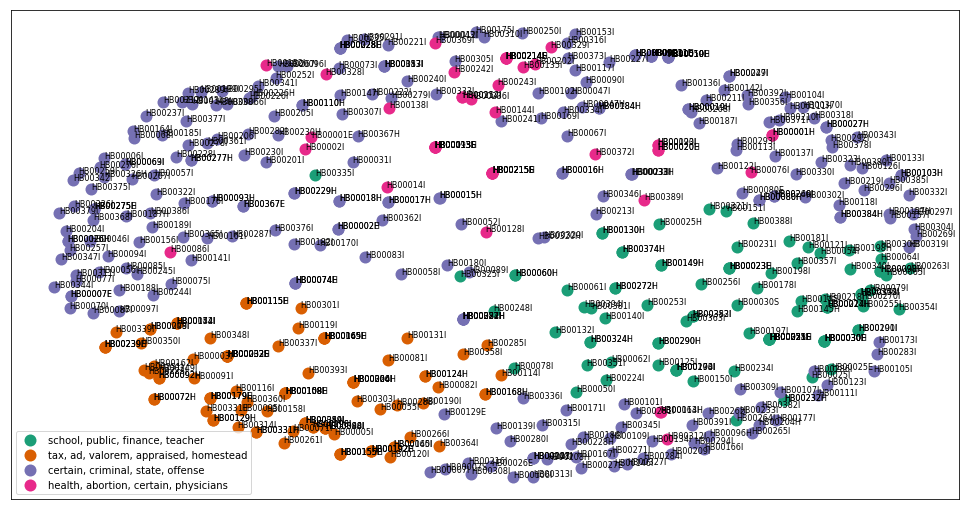

In [24]:
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis= 'x',
                   bottom='off',
                   labelbottom='off',)
    ax.tick_params(axis= 'y', 
                   left='off',
                   labelleft='off')
    
ax.legend(numpoints=1)

#add label in x,y position with the bill name as the label
for i in range(len(cluster_df)):
    ax.text(cluster_df.loc[i]['x'], cluster_df.loc[i]['y'], cluster_df.loc[i]['title'], size=8)  
    
plt.show()